 ## Goals
 - Understanding indicators for sustainable lifestyle behaviour and creating targeted actionable insights for improving low sustainbility rating

### Data Dictionary

- **ParticipantID**: A unique identifier for each participant.
- **Age**: The age of the participant.
- **Location**: The location of the participant (Urban, Suburban, or Rural).
- **DietType**: The dietary preference of the participant (Mostly Plant-Based, Balanced, or Mostly Animal-Based).
- **LocalFoodFrequency**: How often the participant consumes locally sourced food (Often, Sometimes, or Rarely).
- **TransportationMode**: The primary mode of transportation used by the participant (Bike, Public Transit, Car, or Walk).
- **EnergySource**: The primary source of energy used in the participant's home (Renewable, Mixed, or Non-Renewable).
- **HomeType**: The type of dwelling the participant lives in (Apartment or House).
- **HomeSize**: The size of the participant's home in square feet.
- **ClothingFrequency**: How often the participant purchases new clothing (Often, Sometimes, or Rarely).
- **SustainableBrands**: Whether the participant prioritizes purchasing from sustainable brands (True or False).
- **EnvironmentalAwareness**: A rating (1-5) indicating the participant's level of environmental awareness.
- **CommunityInvolvement**: The participant's level of involvement in their community (High, Moderate, or Low).
- **MonthlyElectricityConsumption**: The participant's average monthly electricity consumption in kilowatt-hours.
- **MonthlyWaterConsumption**: The participant's average monthly water consumption in gallons.
- **Gender**: The gender of the participant (Male, Female, or Non-Binary).
- **UsingPlasticProducts**: How often the participant uses plastic products (Often, Sometimes, or Rarely).
- **DisposalMethods**: The primary method the participant uses to dispose of waste (Composting, Recycling, Landfill, or Combination).
- **PhysicalActivities**: The participant's level of physical activity (High, Moderate, or Low).
- **Rating**: The overall sustainability rating assigned to the participant (1-5).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('lifestyle_sustainability_data.csv')
df.index

RangeIndex(start=0, stop=499, step=1)

In [42]:
df.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [11]:

#Creates a custom color map, so that for each plot, values will have a consistent color,

color_map = {'Mostly Plant-Based': 'forestgreen',
             'Balanced': 'cornflowerblue',
             'Mostly Animal-Based': 'firebrick',
             'Younger': 'mediumslateblue',
             'Middle': 'gold',
             'Older': 'peru'}

DietType
Mostly Plant-Based     197
Balanced               158
Mostly Animal-Based    144
Name: count, dtype: int64


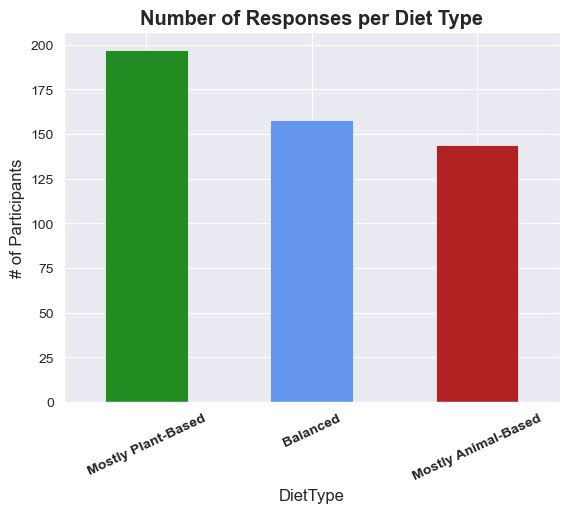

In [11]:
sns.set_style("darkgrid")

Diet_counts = df['DietType'].value_counts()
colors = Diet_counts.index.map(color_map)

Diet_counts.plot(kind = 'bar', color = colors)
plt.title('Number of Responses per Diet Type',weight = 'bold')
plt.ylabel('# of Participants')

plt.xticks(rotation = 25,weight = 'bold')
print(Diet_counts)
plt.savefig('diettype_count.png', dpi=100, bbox_inches='tight')
plt.show()


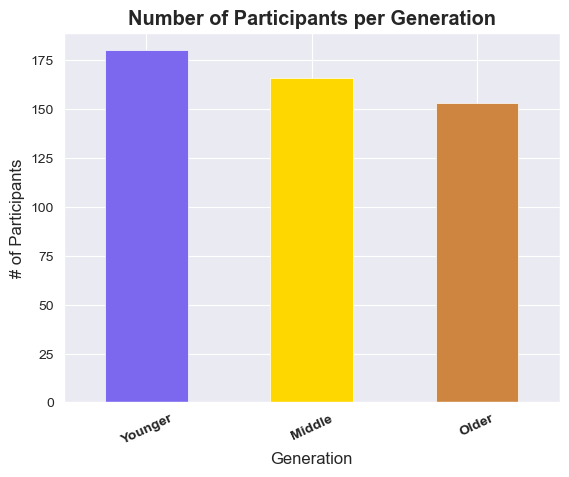

Generation
Younger    180
Middle     166
Older      153
Name: count, dtype: int64
499




In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

Generation_counts = df['Generation'].value_counts()
colors = Generation_counts.index.map(color_map)

Generation_counts.plot(kind = 'bar', color = colors)
plt.title('Number of Participants per Generation',weight = 'bold')
plt.ylabel('# of Participants')
plt.xticks(rotation = 25,weight = 'bold')
plt.savefig('generation_count.png', dpi=100, bbox_inches='tight')
plt.show()
print(Generation_counts)
print(sum(Generation_counts))
print('\n')




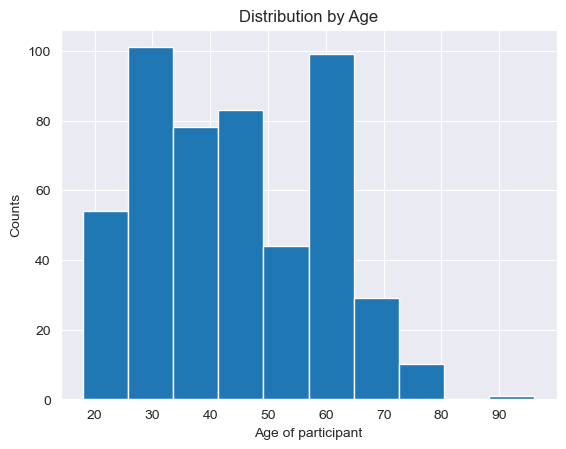

In [1291]:
plt.hist(df['Age'])
plt.title('Distribution by Age')
plt.xlabel('Age of participant')
plt.ylabel('Counts')
plt.savefig('histogram_generation_count.png', dpi=100, bbox_inches='tight')
plt.show()

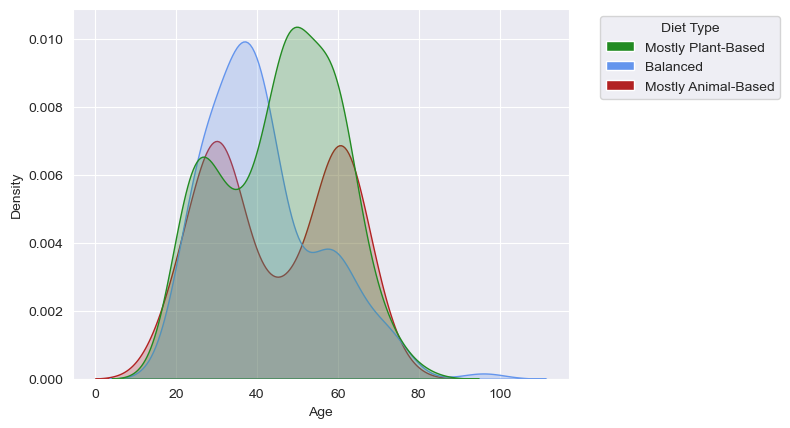

In [1307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

df['weight'] = 1
#sns.histplot(data = df, x = df['Age'], hue = df['DietType'], palette = color_map, element = 'step')
sns.kdeplot(data = df, x = df['Age'], hue = df['DietType'], palette = color_map, fill = True)# common_norm= False,  weights=  df['weight'])
legend_colors = [Patch(facecolor=color_map[label], label=label) for label in df['DietType'].unique()]
plt.legend(handles = legend_colors,
           title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
plt.savefig('kde_generation_count.png', dpi=100, bbox_inches='tight')
plt.show()


DietType    Mostly Plant-Based  Balanced  Mostly Animal-Based
Generation                                                   
Younger                     57        58                   65
Middle                      79        66                   21
Older                       61        34                   58


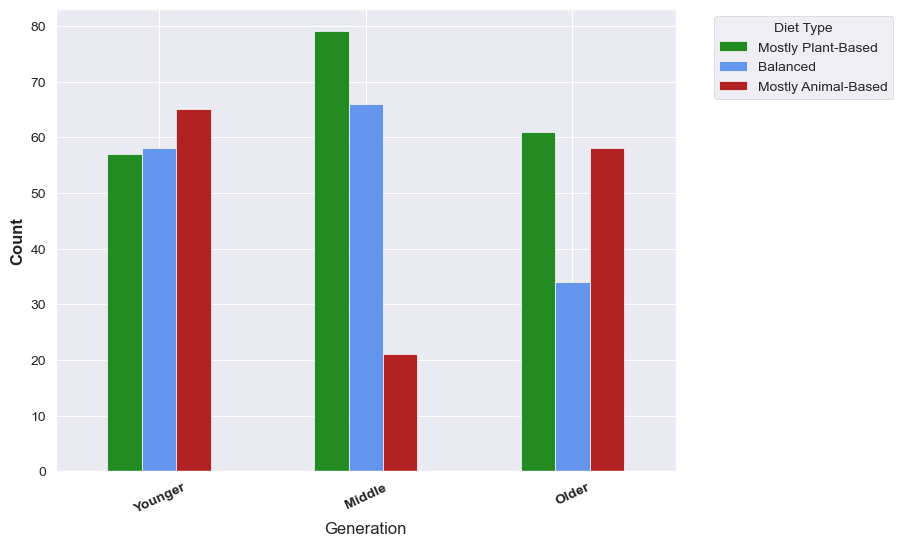

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

diet = pd.crosstab(df['Generation'], df['DietType'])   
diet = diet.reindex(['Younger', 'Middle', 'Older'])
diet = diet.iloc[ : ,[2,0,1]]


fig, ax= plt.subplots( figsize=(6,10))

diet.plot(kind='bar', stacked =False, color=color_map, figsize=(8,6), ax=ax)


order = [2,0,1]
plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
plt.ylabel('Count',weight = 'bold')
plt.xticks(rotation = 25,weight = 'bold')
print(diet)
plt.savefig('generation_and_diettype_bar.png', dpi=100, bbox_inches='tight')
plt.show()

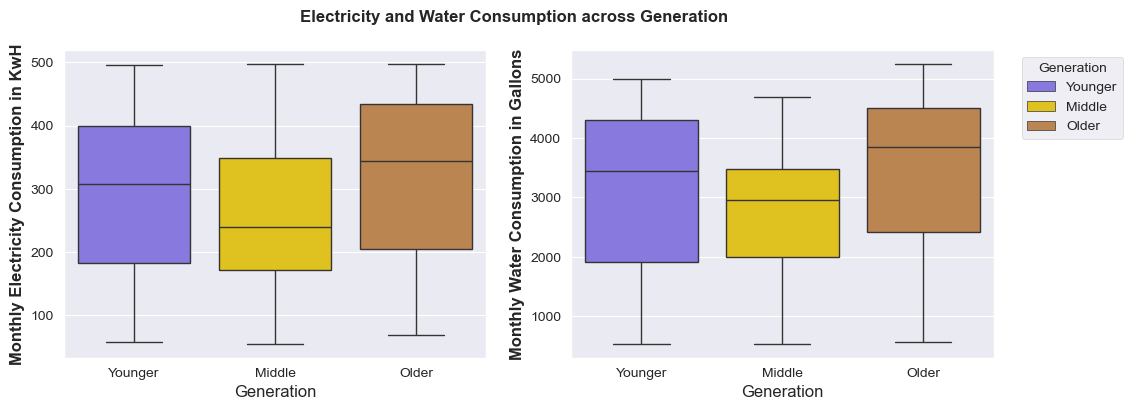

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,4))

sns.boxplot(data = df, x = 'Generation', y = 'MonthlyElectricityConsumption',
               hue='Generation', order=['Younger', 'Middle','Older'], legend=False, ax=ax1, palette=color_map)
ax1.set_ylabel('Monthly Electricity Consumption in KwH',weight = 'bold')

sns.boxplot(data = df, x = 'Generation', y = 'MonthlyWaterConsumption',
               hue='Generation',order=['Younger', 'Middle','Older'], legend=True, ax=ax2, palette=color_map)
ax2.set_ylabel('Monthly Water Consumption in Gallons',weight = 'bold')
plt.suptitle('Electricity and Water Consumption across Generation',weight = 'bold')

handles, labels = plt.gca().get_legend_handles_labels() 
order = [0,2,1]

plt.legend([handles[i] for i in order],[labels[x] for x in order],
           title='Generation',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))
plt.savefig('boxplot_generation_ElectricitytWater.png', dpi=100, bbox_inches='tight')
plt.show()



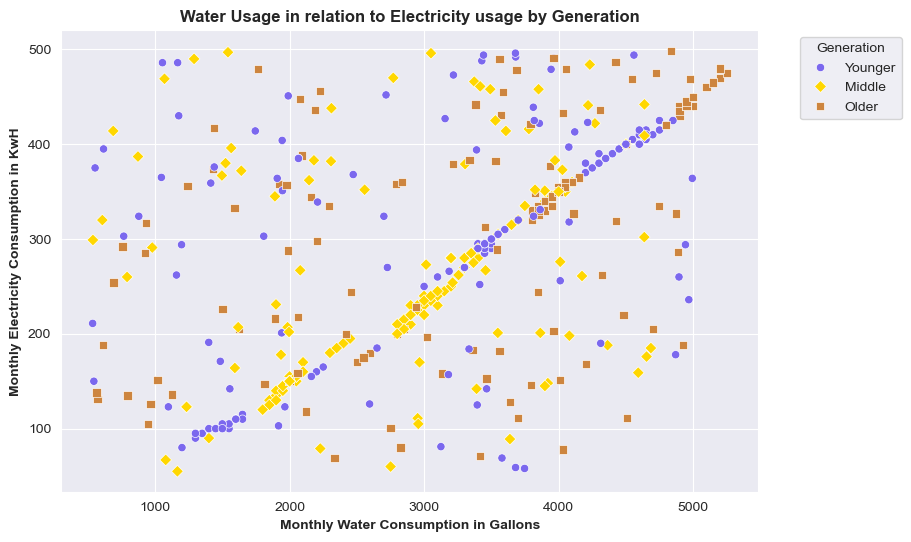

In [1347]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["MonthlyWaterConsumption"],y=df["MonthlyElectricityConsumption"],
                hue = df['Generation'],style = df['Generation'],markers=["o", "s", "D"], palette=color_map)



plt.title('Water Usage in relation to Electricity usage by Generation',weight = 'bold')
plt.xlabel('Monthly Water Consumption in Gallons',weight = 'bold')
plt.ylabel('Monthly Electricity Consumption in KwH',weight = 'bold')

handles, labels = plt.gca().get_legend_handles_labels() 
order = [0,2,1]
plt.legend([handles[i] for i in order],[labels[x] for x in order],
           title='Generation',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))
plt.savefig('scatterplot_WaterElectricity_Generation.png', dpi=100, bbox_inches='tight')
plt.show()

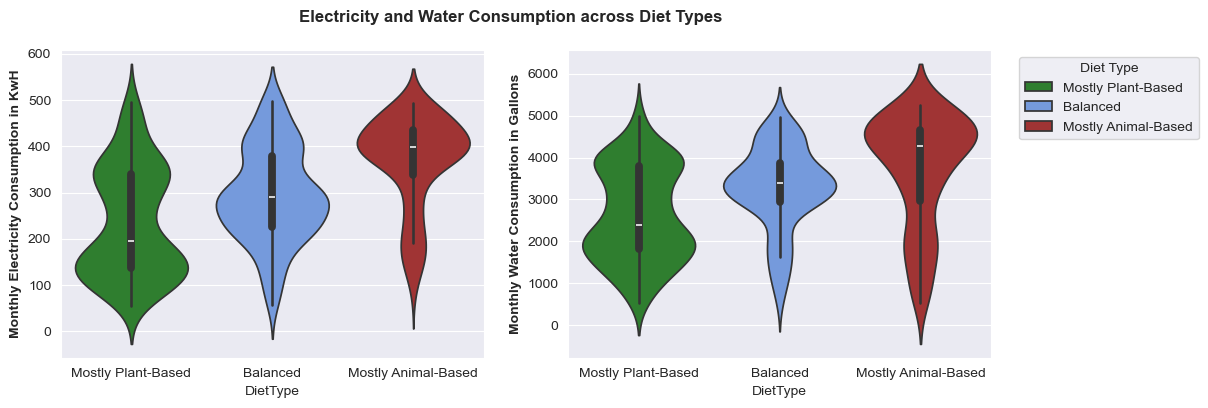

In [1433]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,4))

sns.violinplot(data = df, x = 'DietType', y = 'MonthlyElectricityConsumption',
               hue='DietType', palette=color_map, legend=False, ax=ax1)
ax1.set_ylabel('Monthly Electricity Consumption in KwH',weight = 'bold')

sns.violinplot(data = df, x = 'DietType', y = 'MonthlyWaterConsumption',
               hue='DietType', palette=color_map, legend=True, ax=ax2)
ax2.set_ylabel('Monthly Water Consumption in Gallons',weight = 'bold')
plt.suptitle('Electricity and Water Consumption across Diet Types',weight = 'bold')

ax2.legend(title='Diet Type',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))
plt.savefig('violinplot_diettype_electricitywater.png', dpi=100, bbox_inches='tight')

plt.show()


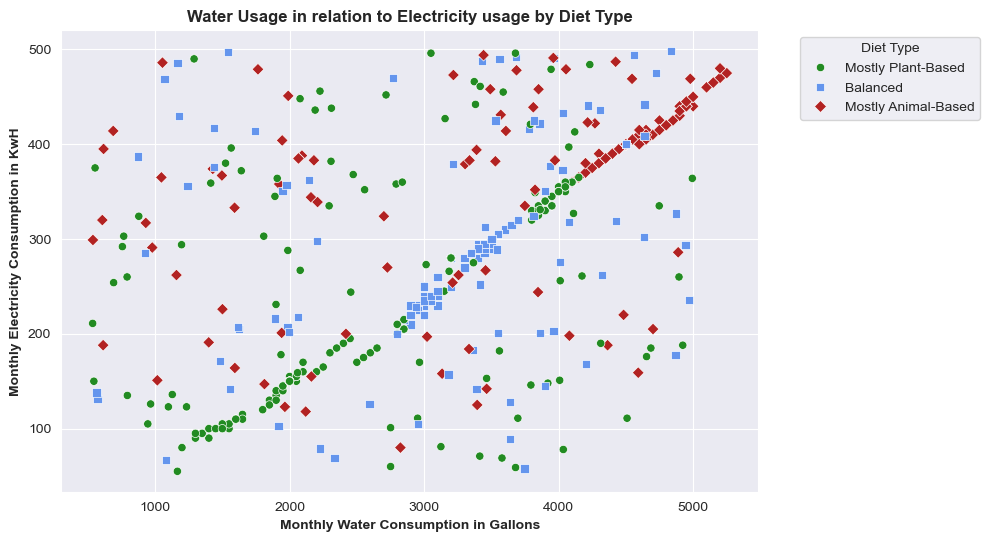

In [1351]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=df["MonthlyWaterConsumption"],y=df["MonthlyElectricityConsumption"],
                hue = df['DietType'],style = df['DietType'],markers=["o", "s", "D"], palette = color_map)  # Use the DietType as the value for the points
                                                                                    # Use custom color map to color 

plt.title('Water Usage in relation to Electricity usage by Diet Type',weight = 'bold')
plt.xlabel('Monthly Water Consumption in Gallons',weight = 'bold')
plt.ylabel('Monthly Electricity Consumption in KwH',weight = 'bold')
plt.legend(title='Diet Type',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))
plt.savefig('scatterplot_diettype_electricitywater.png', dpi=100, bbox_inches='tight')
plt.show()

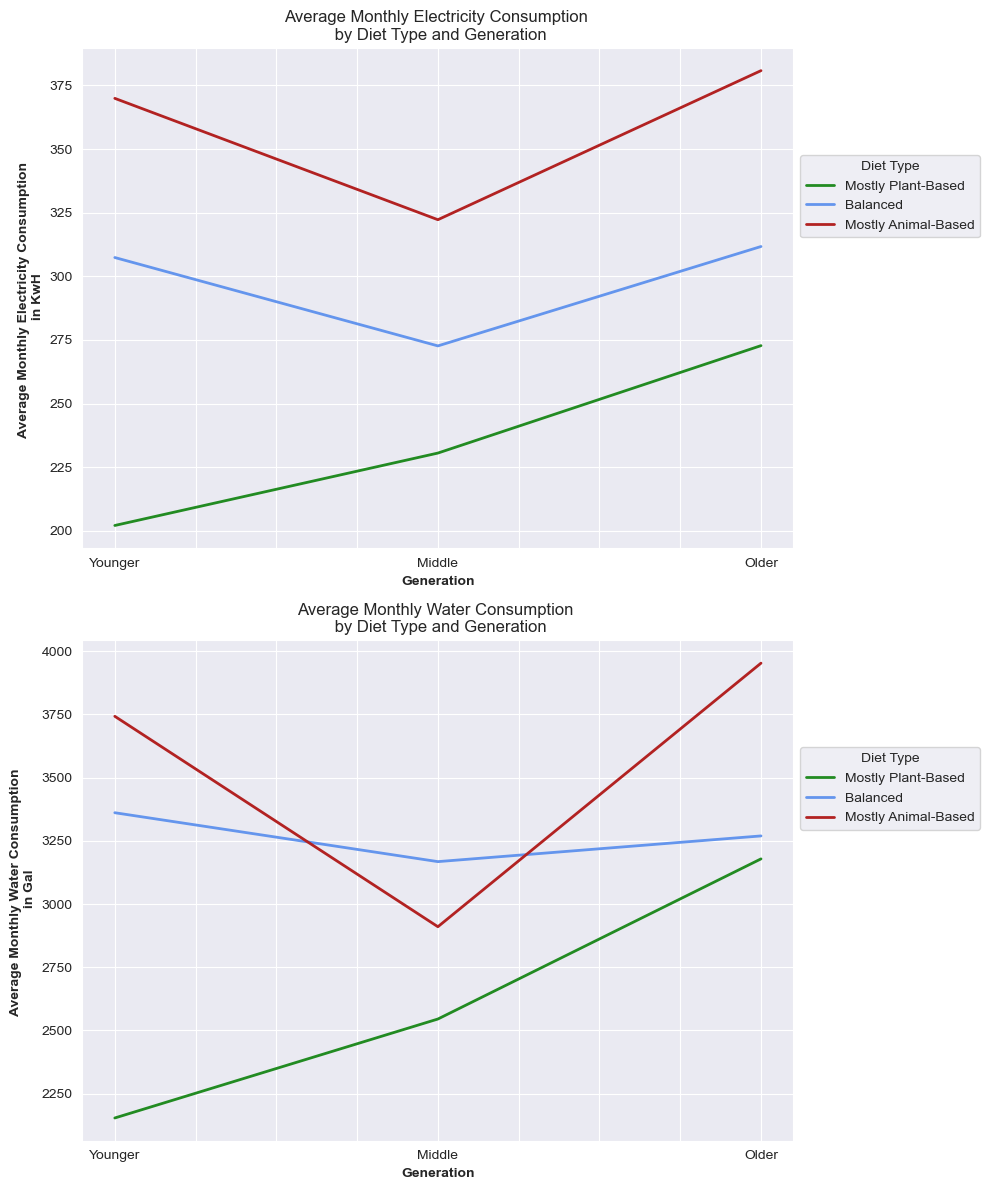

In [1359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

order =['Younger','Middle','Older']

mean_of_electricity_consumption = df.groupby(['Generation', 'DietType'])['MonthlyElectricityConsumption'].mean().unstack().reindex(order)

mean_of_water_consumption = df.groupby(['Generation', 'DietType'])['MonthlyWaterConsumption'].mean().unstack().reindex(order)

sns.set_style("darkgrid")
fig, (ax_E, ax_W)= plt.subplots(2,1, figsize=(10,12))

mean_of_electricity_consumption.plot(kind="line", title='Average Monthly Electricity Consumption \n by Diet Type and Generation',
                                     color= color_map, ax=ax_E,linewidth=2)                                   
ax_E.set_xlabel('Generation',weight = 'bold')
ax_E.set_ylabel('Average Monthly Electricity Consumption \n in KwH',weight = 'bold')

mean_of_water_consumption.plot(kind="line", title='Average Monthly Water Consumption \n by Diet Type and Generation',
                               color= color_map, ax = ax_W, linewidth=2)

ax_W.set_xlabel('Generation',weight = 'bold')
ax_W.set_ylabel('Average Monthly Water Consumption \n in Gal',weight = 'bold')

handlesE, labelsE = ax_E.get_legend_handles_labels()   # get the handles and labels for each variable in Diet Type,
                                                        # to use later to set color_map corresponding to variables in DietType column
handlesW, labelsW = ax_W.get_legend_handles_labels()

order = [2,0,1]   # set specific order of Diet Type variables for legend to correspond with Diet Type variables
ax_E.legend([handlesE[i] for i in order],[labelsE[i] for i in order],
           title = 'Diet Type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8),
          )

ax_W.legend([handlesW[i] for i in order],[labelsW[i] for i in order],
           title = 'Diet Type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8),
          )


plt.tight_layout()
plt.savefig('lineplot_avgelect_avgwater_diettype_generation.png')
plt.show()



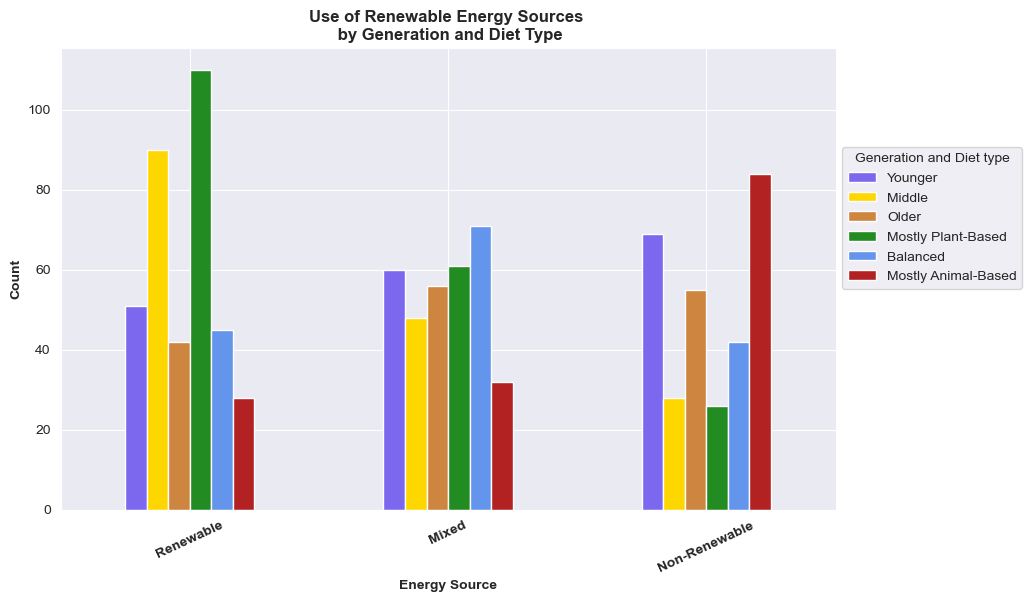

In [1361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

energy_diet = pd.crosstab(df['EnergySource'],df['DietType'])
energy_diet = energy_diet.reindex(['Renewable', 'Mixed', 'Non-Renewable'])
energy_diet = energy_diet.iloc[ : ,[2,0,1]]

energy_age = pd.crosstab(df['EnergySource'],df['Generation'])
energy_age = energy_age.reindex(['Renewable', 'Mixed', 'Non-Renewable'])
energy_age = energy_age.iloc[ : ,[2,0,1]]

energy= pd.merge(energy_age, energy_diet, on ='EnergySource')

energy.plot(kind='bar', stacked = False, color=color_map,figsize=(10, 6))


plt.xticks(rotation=25,weight = 'bold')

plt.title('Use of Renewable Energy Sources \n by Generation and Diet Type',weight = 'bold')
plt.ylabel('Count',weight = 'bold')
plt.xlabel('Energy Source',weight = 'bold')
plt.xticks()
plt.legend(title = 'Generation and Diet type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8))
plt.savefig('renewables_generation_diettype_barplot.png', dpi=100, bbox_inches='tight')
plt.show()

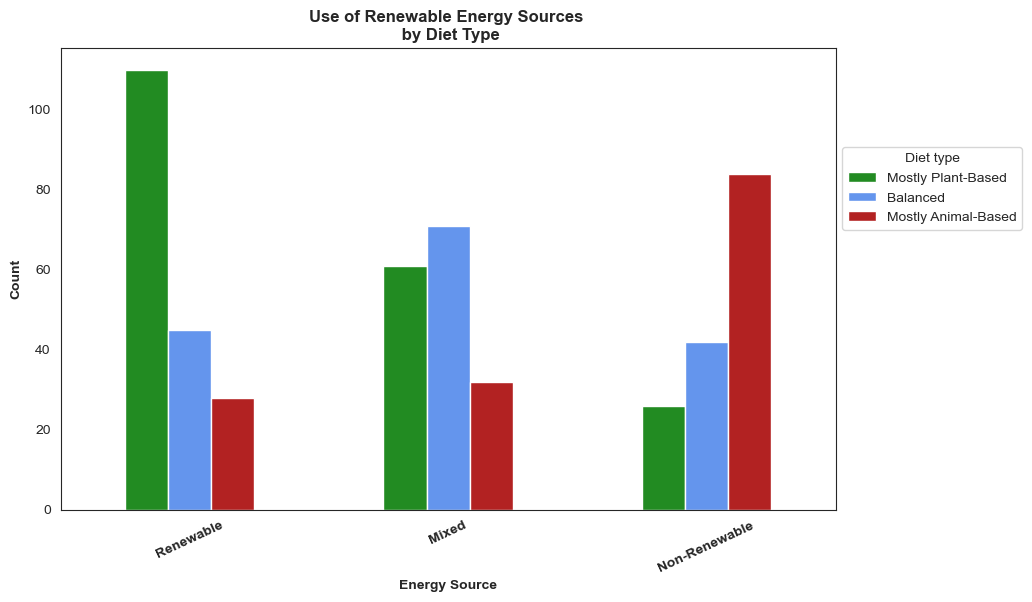

In [1455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

energy_diet = pd.crosstab(df['EnergySource'],df['DietType'])
energy_diet = energy_diet.reindex(['Renewable', 'Mixed', 'Non-Renewable'])
energy_diet = energy_diet.iloc[ : ,[2,0,1]]

energy_diet.plot(kind='bar', stacked = False, color=color_map,figsize=(10, 6))


plt.xticks(rotation=25,weight = 'bold')

plt.title('Use of Renewable Energy Sources \n by Diet Type',weight = 'bold')
plt.ylabel('Count',weight = 'bold')
plt.xlabel('Energy Source',weight = 'bold')
plt.xticks()
plt.legend(title = 'Diet type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8))
plt.savefig('renewables_diettype_barplot.png', dpi=100, bbox_inches='tight')
plt.show()


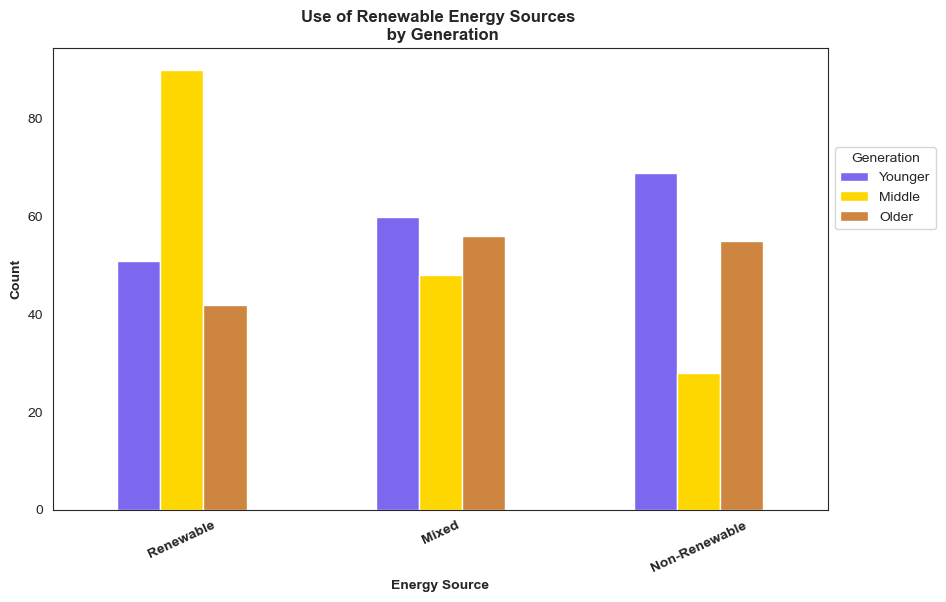

In [1457]:
energy_age = pd.crosstab(df['EnergySource'],df['Generation'])
energy_age = energy_age.reindex(['Renewable', 'Mixed', 'Non-Renewable'])
energy_age = energy_age.iloc[ : ,[2,0,1]]


energy_age.plot(kind='bar', stacked = False, color=color_map,figsize=(10, 6))


plt.xticks(rotation=25,weight = 'bold')

plt.title('Use of Renewable Energy Sources \n by Generation',weight = 'bold')
plt.ylabel('Count',weight = 'bold')
plt.xlabel('Energy Source',weight = 'bold')
plt.xticks()
plt.legend(title = 'Generation',
          loc = 'upper left',
          bbox_to_anchor = (1., .8))
plt.savefig('renewables_generation_barplot.png', dpi=100, bbox_inches='tight')
plt.show()


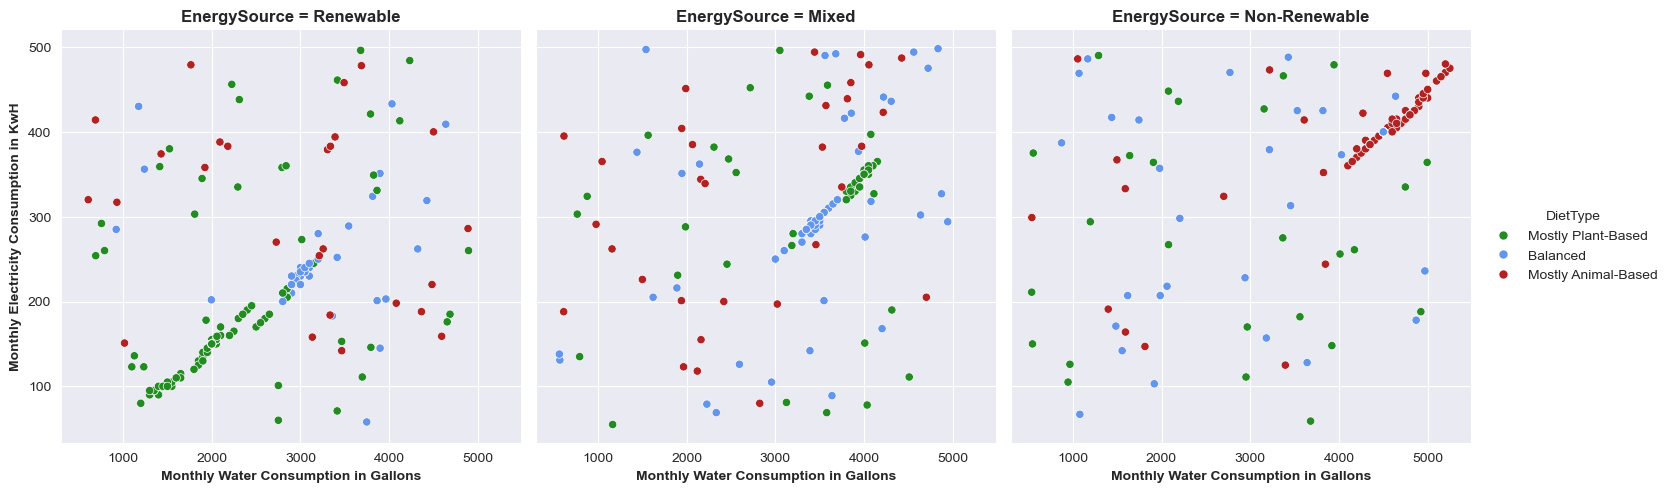

In [1477]:
sns.set_style("darkgrid")
energy = sns.relplot(     # use relplot to show the relationship between these numeric values with the two important categorical values
    data=df,
    x='MonthlyWaterConsumption',
    y='MonthlyElectricityConsumption',
    hue='DietType',
    col='EnergySource',
    kind='scatter',
    palette=color_map,
    markers=["o", "s", "D"])

for ax in energy.axes.flat:
    ax.set_xlabel('Monthly Water Consumption in Gallons', fontweight='bold')
    ax.set_ylabel('Monthly Electricity Consumption in KwH', fontweight='bold')
for ax in energy.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')

# order = [2,0,1] 
# h, l = ax.get_legend_handles_labels()
# ax.legend([h[i] for i in order],[l[i] for i in order],
#           title = 'Diet Type',
#           loc = 'upper left',
#           bbox_to_anchor = (1., .8),
#           )   
plt.savefig('relplot_scatterplot_diettype_energysource.png', dpi=100, bbox_inches='tight')
plt.show()

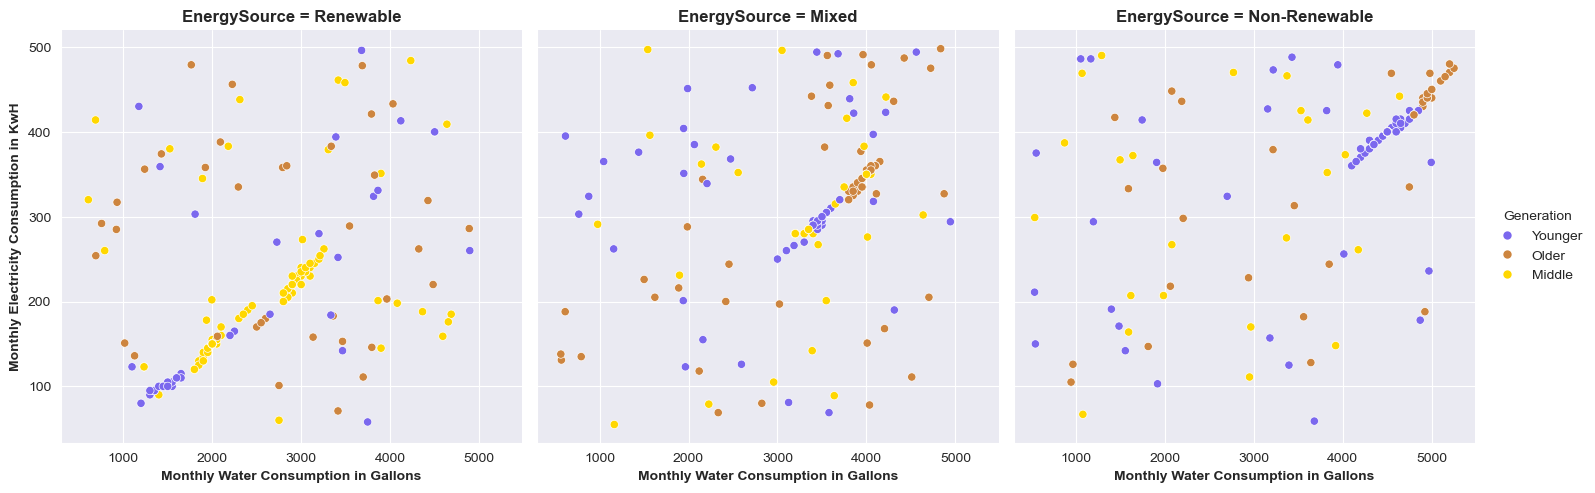

In [15]:
sns.set_style("darkgrid")
energy = sns.relplot(     # use relplot to show the relationship between these numeric values with the two important categorical values
    data=df,
    x='MonthlyWaterConsumption',
    y='MonthlyElectricityConsumption',
    hue='Generation',
    col='EnergySource',
    kind='scatter',
    palette=color_map,
    markers=["o", "s", "D"])

for ax in energy.axes.flat:
    ax.set_xlabel('Monthly Water Consumption in Gallons', fontweight='bold')
    ax.set_ylabel('Monthly Electricity Consumption in KwH', fontweight='bold')
for ax in energy.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')


    
plt.savefig('relplot_scatterplot_generation_energysource.png', dpi=100, bbox_inches='tight')
plt.show()

Location            Rural  Suburban  Urban
LocalFoodFrequency                        
Rarely                 51        25     56
Sometimes              51        36     49
Often                  32        76     40
Always                 19        19     45
--------------------------------------------------------------------------------
DietType            Balanced  Mostly Animal-Based  Mostly Plant-Based
LocalFoodFrequency                                                   
Rarely                    21                   85                  26
Sometimes                 68                   16                  52
Often                     56                   19                  73
Always                    13                   24                  46


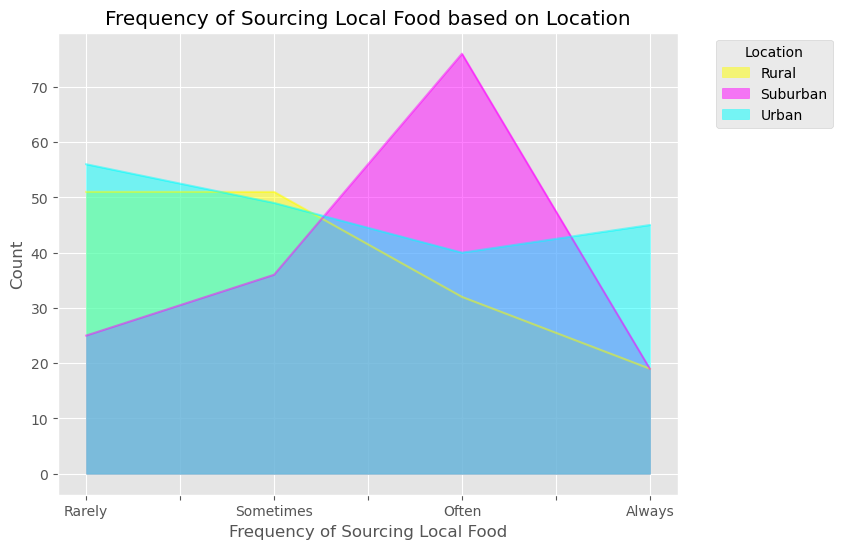

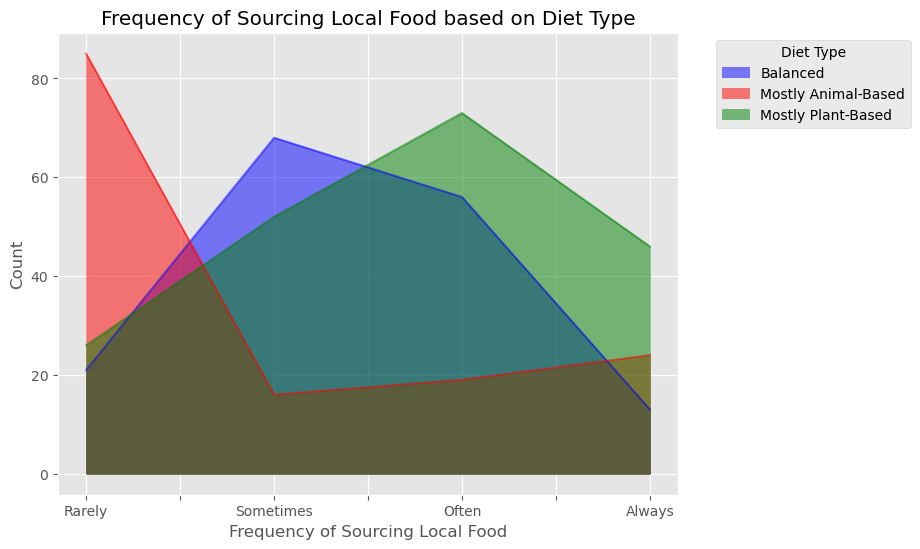

In [1373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')

location= pd.crosstab(df['LocalFoodFrequency'], df['Location'])

location = location.reindex(['Rarely', 'Sometimes', 'Often', 'Always'])



fig, ax = plt.subplots(figsize=(8,6))

location.plot(kind='area', stacked = False, ax=ax, color= color_map)
            
ax.legend(title='Location', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)

ax.set_title('Frequency of Sourcing Local Food based on Location')
ax.set_xlabel('Frequency of Sourcing Local Food')
ax.set_ylabel('Count')
print(location)
print('-' * 80)

diet = pd.crosstab(df['LocalFoodFrequency'], df['DietType'])
diet = diet.reindex(['Rarely', 'Sometimes', 'Often', 'Always'])
diet.plot(kind='area', stacked =False, color=color_map, figsize=(8,6))
plt.title('Frequency of Sourcing Local Food based on Diet Type')
plt.xlabel('Frequency of Sourcing Local Food')
plt.ylabel('Count')

plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
print(diet)

Text(0.5, 1.1, 'Frequency of Sourcing Local Food, based on Diet Type and Location')

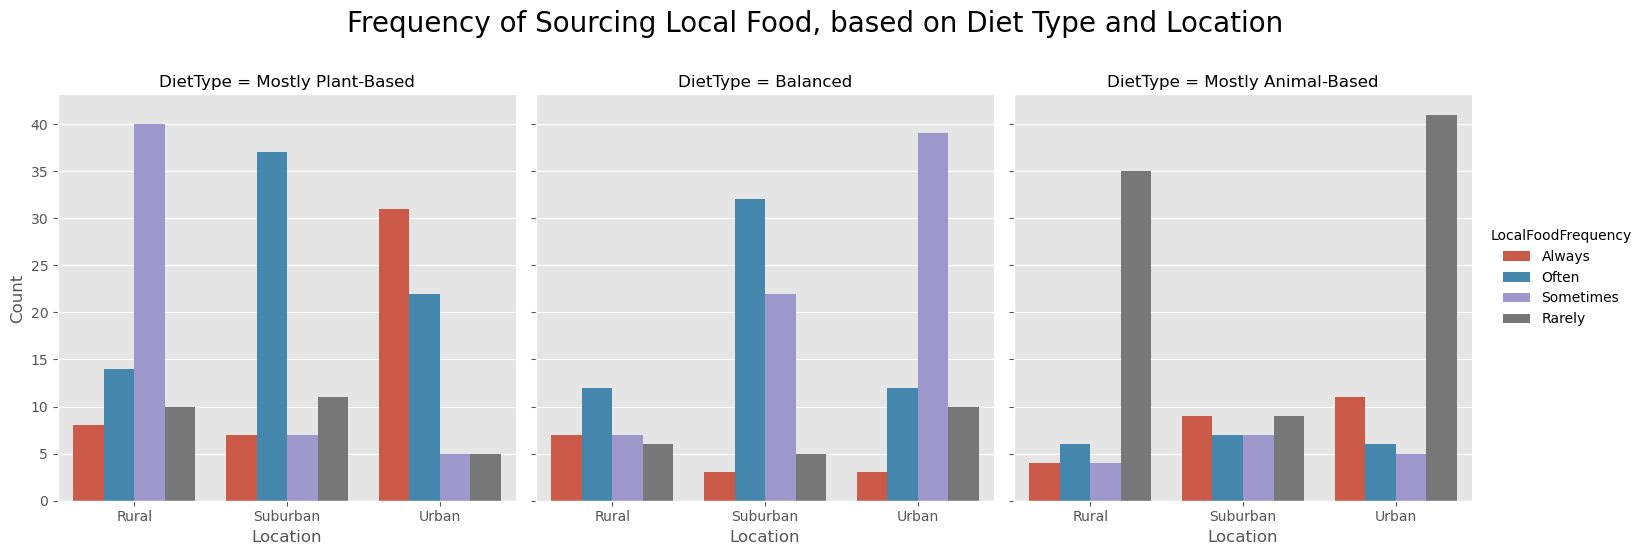

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')


df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

food_freq = df.groupby(['DietType', 'Location','LocalFoodFrequency']).size().reset_index(name='Count')


sns.catplot(data = food_freq, x = 'Location', y = 'Count',
            hue = 'LocalFoodFrequency', hue_order=['Always', 'Often', 'Sometimes', 'Rarely'],
            col = 'DietType', col_order =['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based'],
            kind = 'bar')
plt.suptitle('Frequency of Sourcing Local Food, based on Diet Type and Location', y=1.1, fontsize=20)

DietType              Balanced  Mostly Animal-Based  Mostly Plant-Based
UsingPlasticProducts                                                   
Often                       32                   90                  22
Sometimes                   81                   10                  27
Rarely                      32                   23                  87


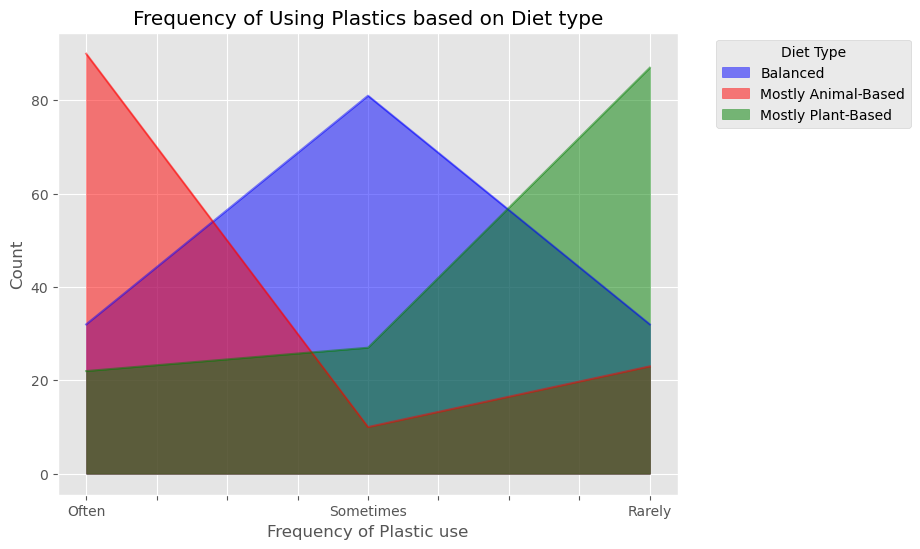

In [179]:
plastics = pd.crosstab(df['UsingPlasticProducts'], df['DietType'])
plastics = plastics.reindex(['Often', 'Sometimes', 'Rarely'])
plastics.plot(kind='area', stacked =False, color=color_map, figsize=(8,6))
plt.title('Frequency of Using Plastics based on Diet type')
plt.xlabel('Frequency of Plastic use')
plt.ylabel('Count')

plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
print(plastics)

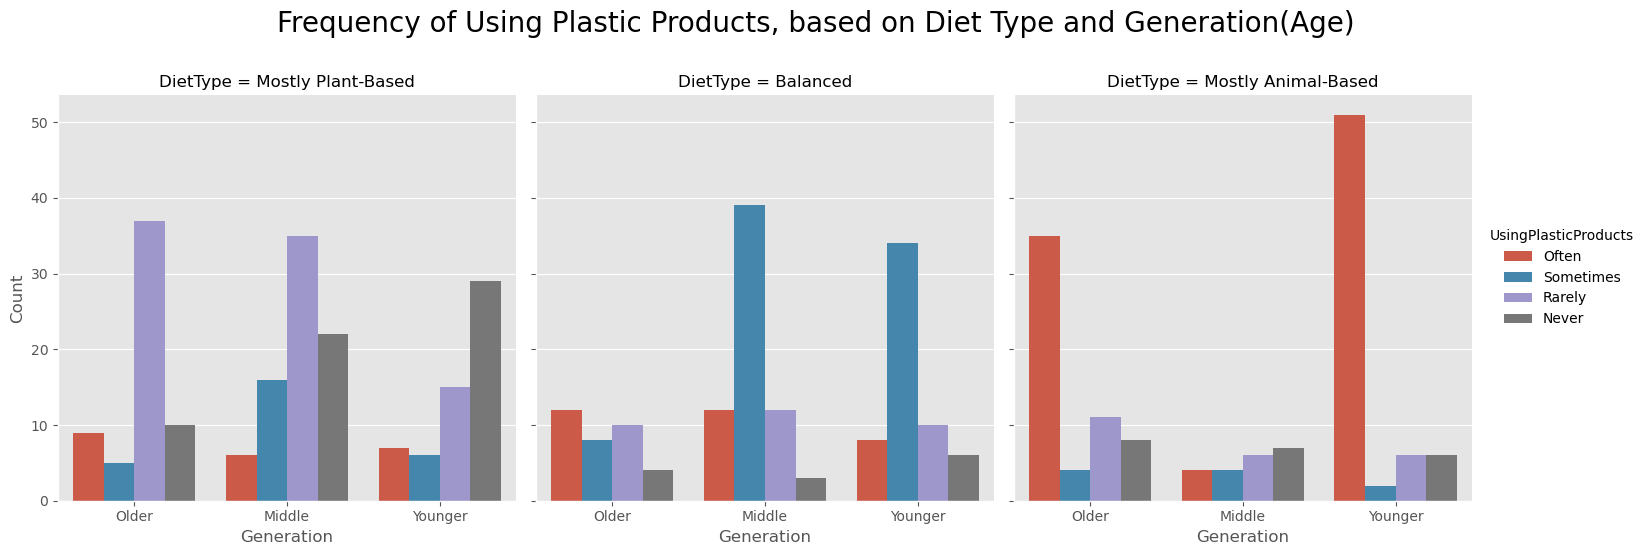

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')


df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

plastic_usage = df.groupby(['DietType', 'Generation','UsingPlasticProducts']).size().reset_index(name='Count')

sns.catplot(data = plastic_usage, x = 'Generation', order=['Older','Middle','Younger'], y = 'Count',
            hue = 'UsingPlasticProducts', hue_order=['Often', 'Sometimes', 'Rarely', 'Never'],
            col = 'DietType', col_order =['Mostly Plant-Based', 'Balanced', 'Mostly Animal-Based'],
            kind = 'bar')
plt.suptitle('Frequency of Using Plastic Products, based on Diet Type and Generation(Age)', y=1.1, fontsize=20)

plt.show()

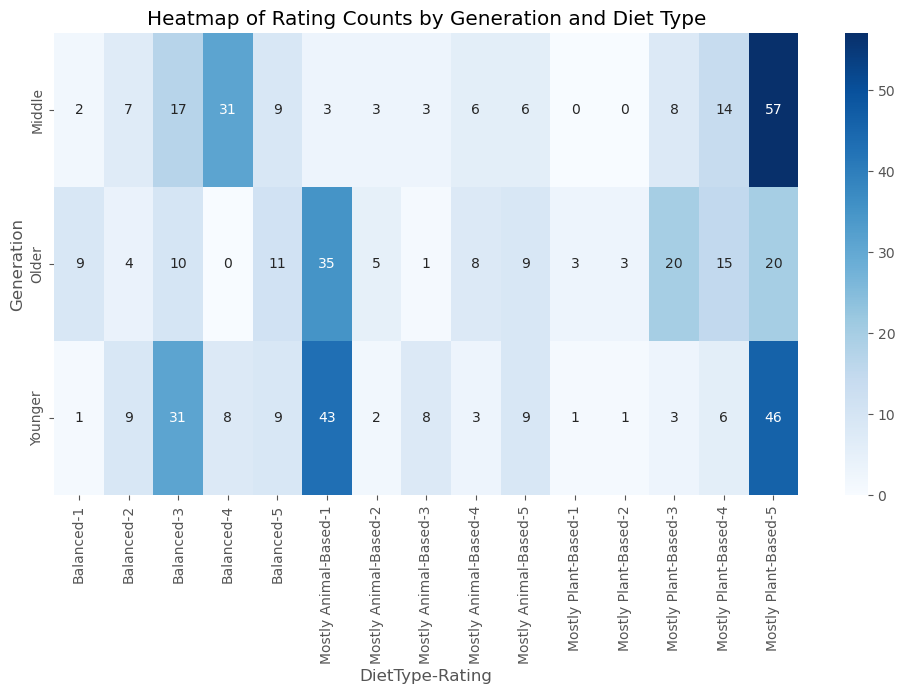

In [71]:
import seaborn as sns
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

heat = df.groupby(['Generation', 'DietType', 'Rating']).size().reset_index(name='Count')

heatmap_data = heat.pivot_table(index='Generation', columns=['DietType', 'Rating'], values='Count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Heatmap of Rating Counts by Generation and Diet Type')
plt.show()

Text(0, 0.5, 'Average Environmental Awareness')

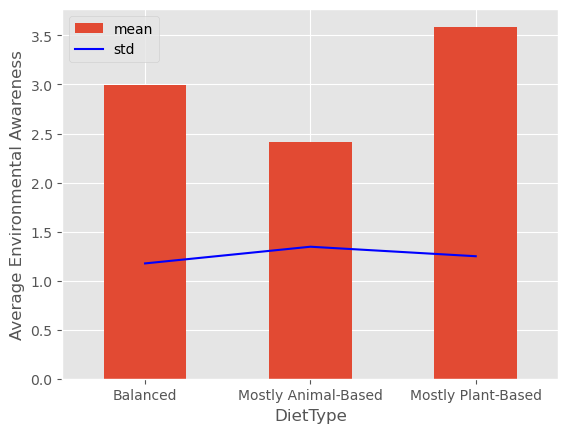

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
numeric_cols = df.select_dtypes(include='number').columns
fig, ax = plt.subplots()


df1 = df[numeric_cols].groupby(df['DietType']).agg([ 'mean'])['EnvironmentalAwareness']
df2 = df[numeric_cols].groupby(df['DietType']).agg([ 'std'])['EnvironmentalAwareness']
df1.plot(kind='bar', ax=ax)
df2.plot(kind='line', ax=ax, color='blue')
plt.ylabel('Average Environmental Awareness')

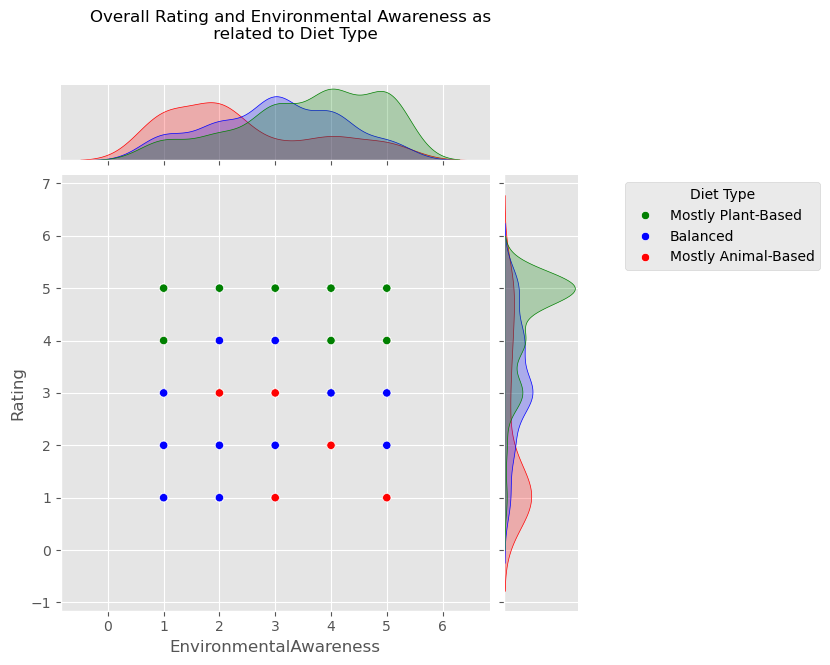

In [127]:
sns.jointplot(data = df, x= 'EnvironmentalAwareness', y= 'Rating', hue ='DietType', kind ='scatter', palette= color_map)
plt.suptitle('Overall Rating and Environmental Awareness as \n related to Diet Type', y=1.1)
plt.legend(title = 'Diet Type',
          loc = 'upper left',
          bbox_to_anchor = (1.3, 1))

<Axes: xlabel='DietType'>

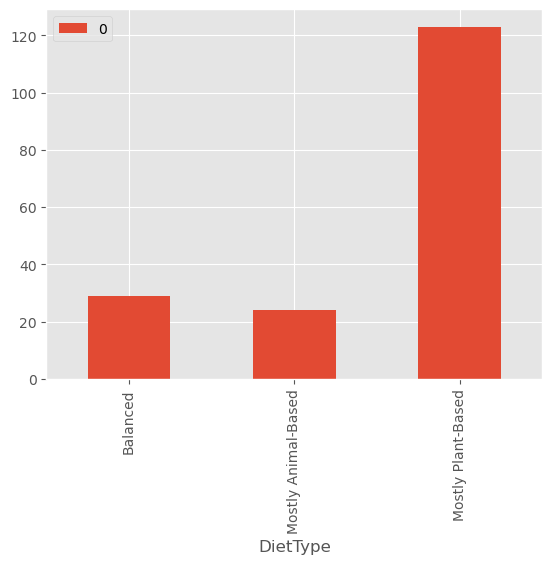

In [61]:
df_5rating = df[['DietType', 'Rating']]
fives = df_5rating[df_5rating['Rating']==5].groupby('DietType').size().to_frame()
fives.plot(kind='bar')